In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('agg_Xtrain_V2.csv').set_index('Unnamed: 0')
X_test = pd.read_csv('agg_Xtest_V2.csv').set_index('Unnamed: 0')
y_train = pd.read_csv('agg_ytrain_V2.csv').set_index('Unnamed: 0')
y_test = pd.read_csv('agg_ytest_V2.csv').set_index('Unnamed: 0')

In [3]:
#hyperparameter tuning
Kcv = KFold(n_splits=10)
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 
          'max_depth': [i for i in range(1,11)], 
          'max_leaf_nodes': [5,10,15,20,25]}
dec_tree = DecisionTreeClassifier()
grid_search_cv = GridSearchCV(dec_tree, params, cv=Kcv)

In [4]:
#best params found by grid search
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 25, 'splitter': 'best'}

In [5]:
%%time
dec_tree.set_params(**grid_search_cv.best_params_)
dec_tree.fit(X_train,y_train)
pred = dec_tree.predict(X_test)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')

print(f"precision: {precision}, recall: {recall}, f1score: {f1}")

precision: 0.36080140937780075, recall: 0.22395833333333334, f1score: 0.23765816727052222
CPU times: user 98.7 ms, sys: 1.81 ms, total: 101 ms
Wall time: 99.8 ms


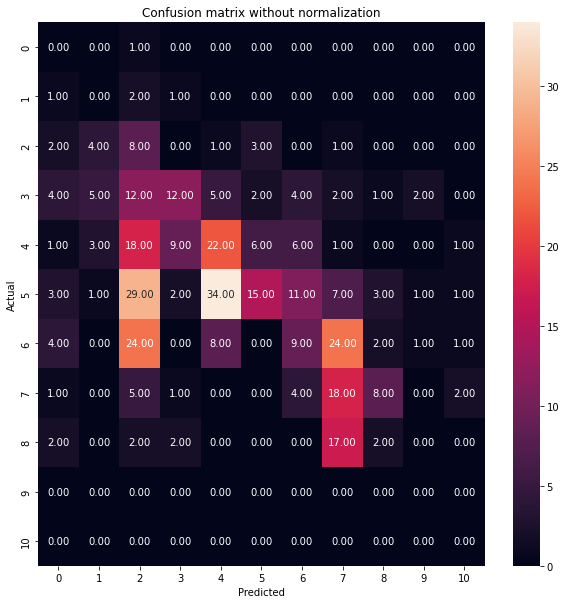

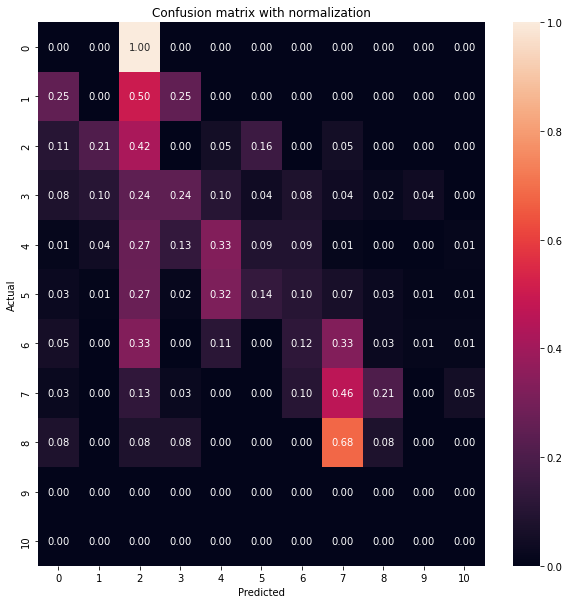

In [6]:
#plot result

matrix = confusion_matrix(y_test, pred)
matrix_normalized = confusion_matrix(y_test, pred, normalize='true')

fig1, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='.2f')
plt.title('Confusion matrix without normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

fig2, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_normalized, annot=True, fmt='.2f')
plt.title('Confusion matrix with normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

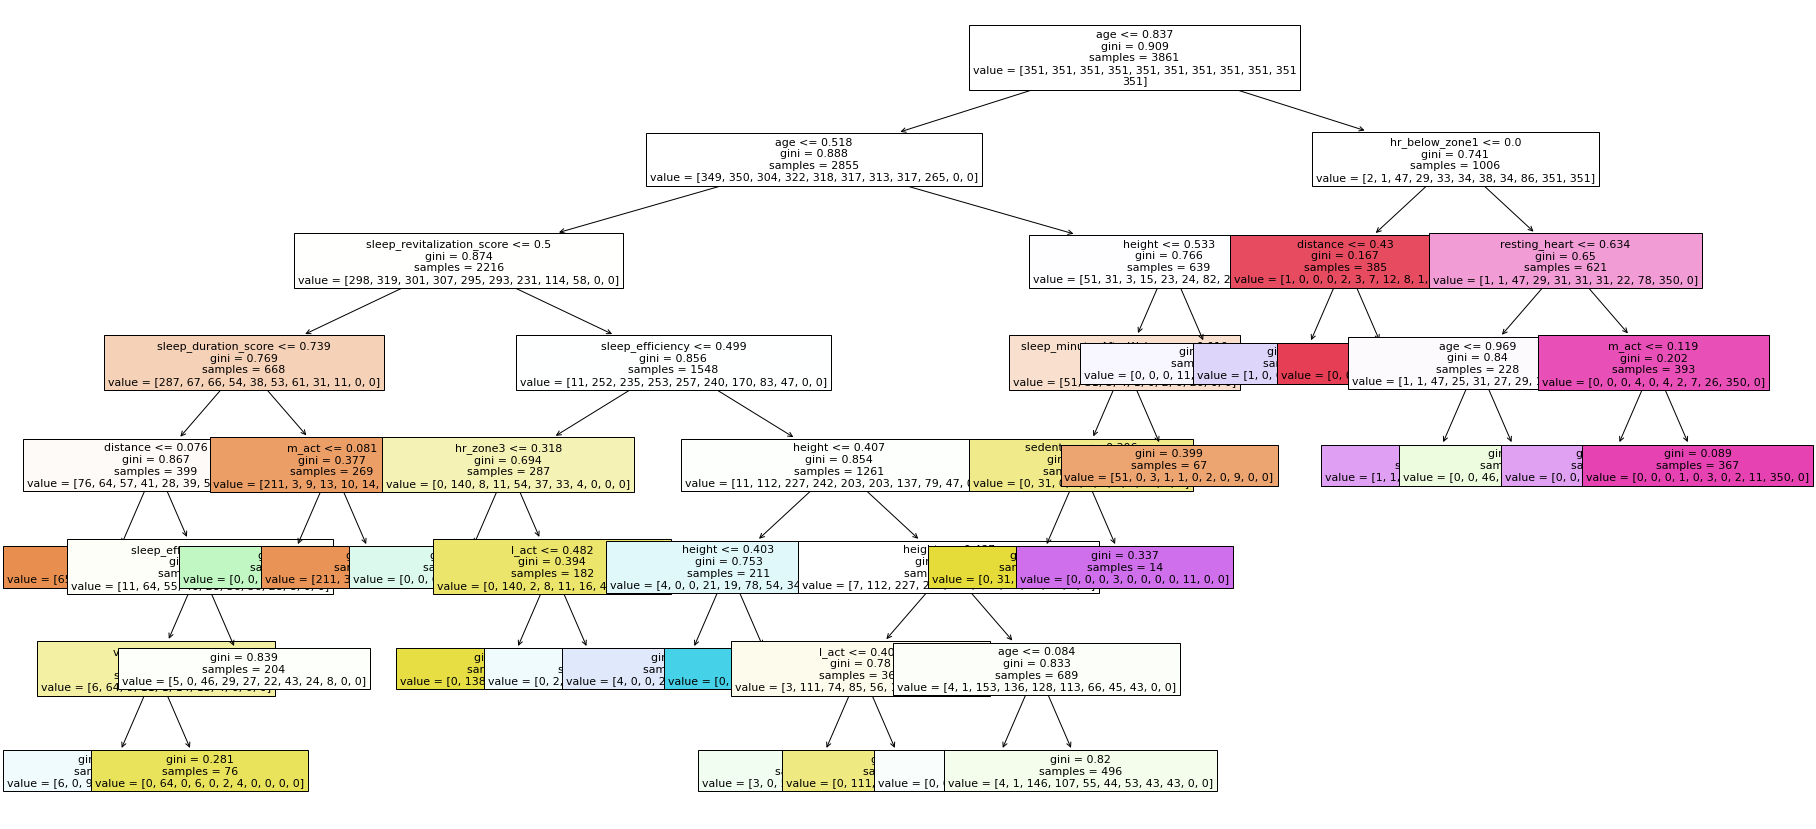

In [7]:
from sklearn import tree

plt.figure(figsize=(30,15))

tree.plot_tree(dec_tree,
              feature_names=X_train.columns,
              filled=True,
              fontsize=11)
plt.show()

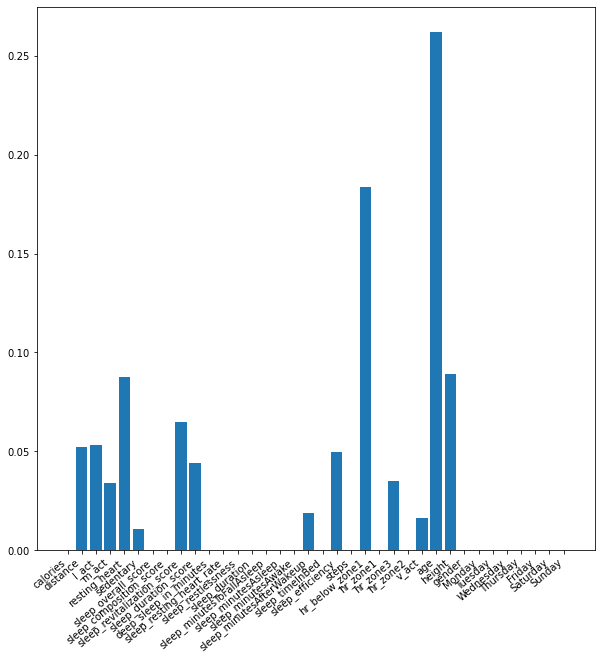

In [8]:
importance = dec_tree.feature_importances_

fig = plt.figure(figsize=(10,10))
plt.bar(X_test.columns, importance)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [9]:
print('training data')
print(classification_report(y_train, dec_tree.predict(X_train)))

print('test data')
print(classification_report(y_test, dec_tree.predict(X_test)))

training data
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       351
         1.0       0.82      0.98      0.90       351
         2.0       0.28      0.68      0.40       351
         3.0       0.35      0.22      0.27       351
         4.0       0.39      0.33      0.36       351
         5.0       0.53      0.20      0.29       351
         6.0       0.34      0.15      0.21       351
         7.0       0.39      0.61      0.47       351
         8.0       0.61      0.22      0.32       351
         9.0       0.95      1.00      0.97       351
        10.0       0.97      1.00      0.99       351

    accuracy                           0.57      3861
   macro avg       0.59      0.57      0.55      3861
weighted avg       0.59      0.57      0.55      3861

test data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         4
